In [2]:
import pandas as pd

# 데이터 업로드

from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [3]:
import pandas as pd

# 데이터 불러오기

df = pd.read_excel('202501.xlsx')

In [4]:
# 금속 농도 열 추출 (단위가 ng/m3인 열)

metal_columns = [col for col in df.columns if '(ng/m3)' in col]

# 날짜 및 시간 추출

df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date
df['Hour'] = df['Pump-Begin'].dt.hour

In [5]:
# 이상치 제거 (NaN, 음수, 0은 결측 처리)

for col in metal_columns:
    df[col] = df[col].apply(lambda x: x if pd.notna(x) and x > 0 else pd.NA)

In [6]:
# 시간별 평균 금속 농도 계산

df_hourly_avg = df.groupby('Hour')[metal_columns].mean().reset_index()

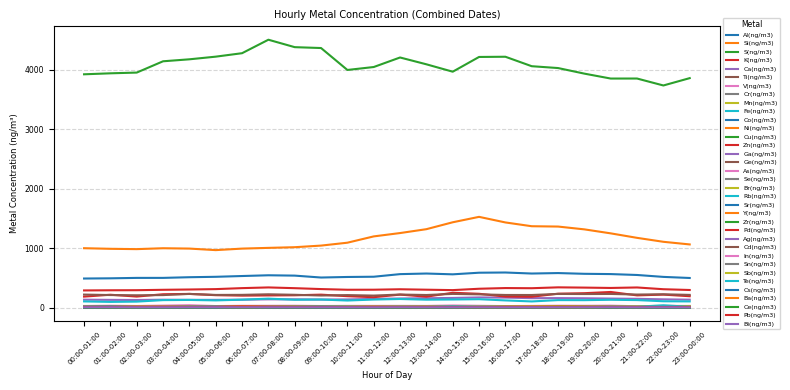

In [16]:
import matplotlib.pyplot as plt

#  선 그래프
plt.figure(figsize=(8, 4))  # 전체 그래프 크기 설정

# 각 금속별 선 그래프 생성
for metal in metal_columns:
    plt.plot(df_hourly_avg['Hour'], df_hourly_avg[metal], label=metal)

# 그래프 기본 설정
plt.title("Hourly Metal Concentration (Combined Dates)", fontsize=7)
plt.xlabel("Hour of Day", fontsize=6)
plt.ylabel("Metal Concentration (ng/m³)", fontsize=6)
plt.xticks(ticks=range(0, 24),
           labels=[f"{h:02d}:00-{(h+1)%24:02d}:00" for h in range(0, 24)],
           rotation=45,
           fontsize=5.0)
plt.yticks(fontsize=5.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 범례 설정
plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           fontsize=4.5,
           title='Metal',
           title_fontsize=5.5)

# 레이아웃 자동 조절
plt.tight_layout()

# 결과 출력
plt.show()